# Ejercicio 24

(primera parte)

a. Encuentre el número óptimo del clusters en el dataset dengue usando como features 'humid', 'temp' , 'h10pix', 'trees' , 'Xmin', 'Ymin' El dataset set puede bajar de esta pagina https://vincentarelbundock.github.io/Rdatasets/datasets.html Utilice http://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html para encontrar los clusters. (segunda parte)

(segunda parte)

b. Utilizando el siguiente dataset https://www.kaggle.com/xvivancos/transactions-from-a-bakery encuentre patrones de compras a partir de métodos PCA y k-mean clustering.

(nuevo lugar del dataset https://github.com/hugotrigueiro/Dataset-Transactions-from-a-Bakery-Exploratory-Data-Analysis-/tree/master/Transactions-from-a-Bakery)

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans

In [2]:
dengue = pd.read_csv('dengue.csv')
dengue.head()

,Unnamed: 0,humid,humid90,temp,temp90,h10pix,h10pix90,trees,trees90,NoYes,Xmin,Xmax,Ymin,Ymax
0,1,0.671389,4.416667,2.037500,8.470835,17.356529,17.808611,0.0,1.5,0,70.5,74.5,38.0,35.5
1,2,7.648334,8.167500,12.325000,14.925000,10.983610,11.691670,0.0,1.0,0,62.5,64.5,35.5,34.5
2,3,6.979056,9.563058,6.925000,14.591660,17.508329,17.625280,0.0,1.2,0,68.5,69.5,36.0,35.0
3,4,1.110416,1.825361,4.641665,6.046669,17.417635,17.516939,0.0,0.6,0,67.0,68.0,35.0,34.0
4,5,9.027055,9.742751,18.175000,19.710000,13.843060,13.843060,0.0,0.0,0,61.0,64.5,33.5,32.0


# Parte 1: K-optimo

In [3]:
x_features = ['humid', 'temp' , 'h10pix', 'trees' , 'Xmin', 'Ymin']
dengue = dengue.dropna()

In [4]:
#Normalizar 
dengue[x_features] = (dengue[x_features] - dengue[x_features].mean())/dengue[x_features].std()

In [5]:
# k mean optimo
mms = MinMaxScaler()
mms.fit(dengue)
dengue_transformed = mms.transform(dengue)

/srv/conda/lib/python3.6/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


In [6]:
squared_distances = []
ks = range(1,20)
for k in ks:
    km = KMeans(n_clusters = k)
    km = km.fit(dengue_transformed)
    squared_distances.append(km.inertia_)

Text(0.5, 1.0, 'Elbow Method For Optimal K')

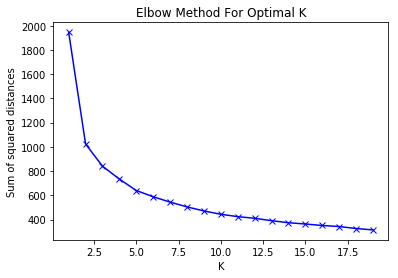

In [7]:
plt.plot(ks,squared_distances,'bx-')
plt.xlabel('K')
plt.ylabel('Sum of squared distances')
plt.title('Elbow Method For Optimal K')

In [8]:
#Otro metodo encontrar k optimo
from __future__ import print_function

from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

For n_clusters = 2 The average silhouette_score is : 0.40811225183136596
For n_clusters = 3 The average silhouette_score is : 0.3283430228750958
For n_clusters = 4 The average silhouette_score is : 0.31718631031237315
For n_clusters = 5 The average silhouette_score is : 0.2782836078378786
For n_clusters = 6 The average silhouette_score is : 0.3083836810634285
For n_clusters = 7 The average silhouette_score is : 0.2933956856085943
For n_clusters = 8 The average silhouette_score is : 0.29285160409162087
For n_clusters = 9 The average silhouette_score is : 0.3060908521736031
For n_clusters = 10 The average silhouette_score is : 0.3070898683026877
For n_clusters = 11 The average silhouette_score is : 0.3123202832477524
For n_clusters = 12 The average silhouette_score is : 0.3067388676272633
For n_clusters = 13 The average silhouette_score is : 0.3184483446493269
For n_clusters = 14 The average silhouette_score is : 0.3244960878229104
For n_clusters = 15 The average silhouette_score is : 0.

/srv/conda/lib/python3.6/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


For n_clusters = 22 The average silhouette_score is : 0.30964829303028296


/srv/conda/lib/python3.6/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


For n_clusters = 23 The average silhouette_score is : 0.30496932386493514


/srv/conda/lib/python3.6/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


For n_clusters = 24 The average silhouette_score is : 0.2937644644401641


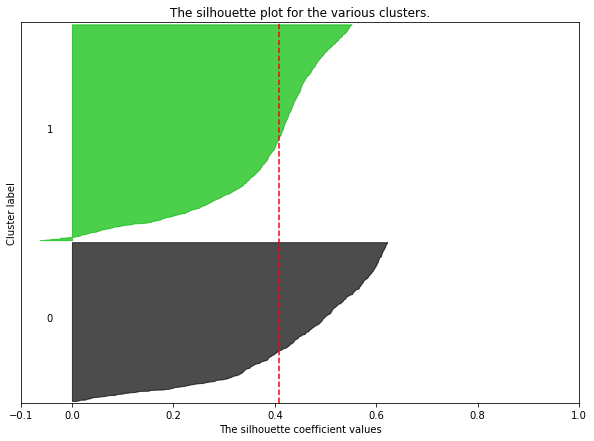

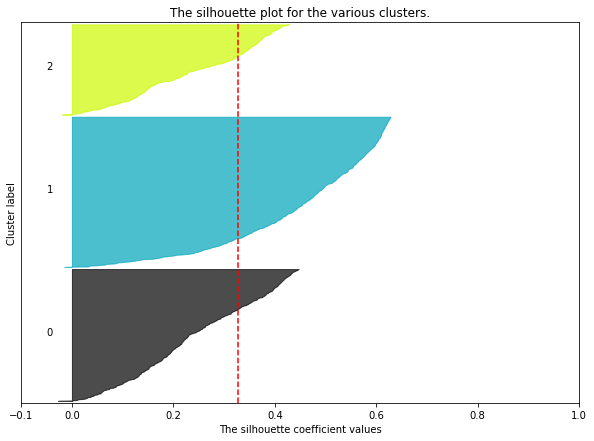

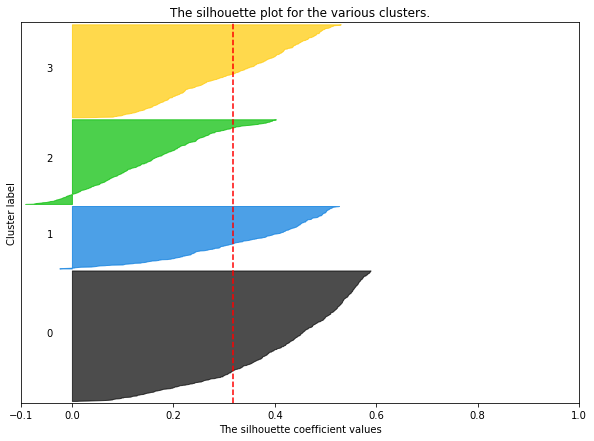

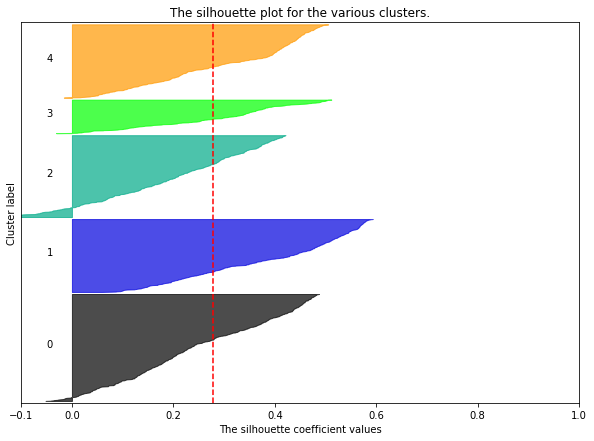

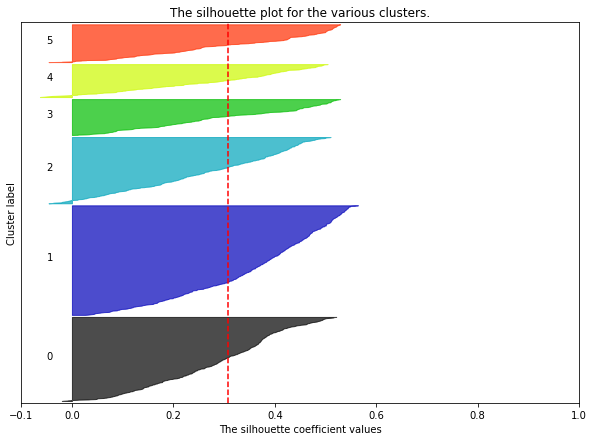

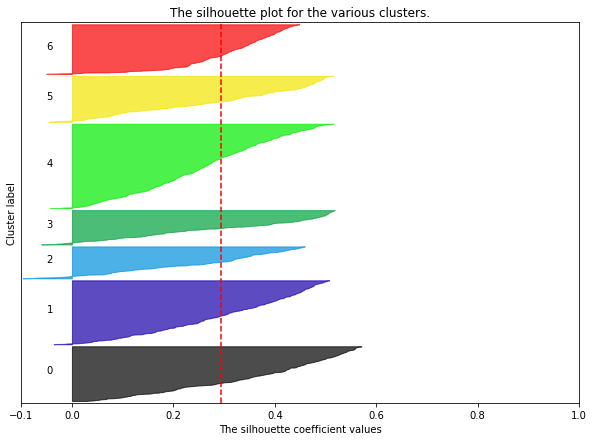

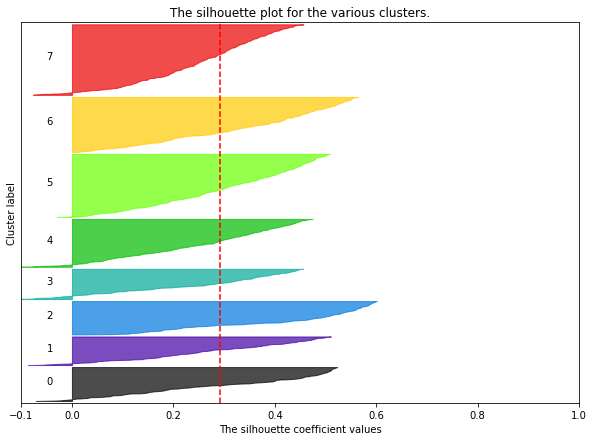

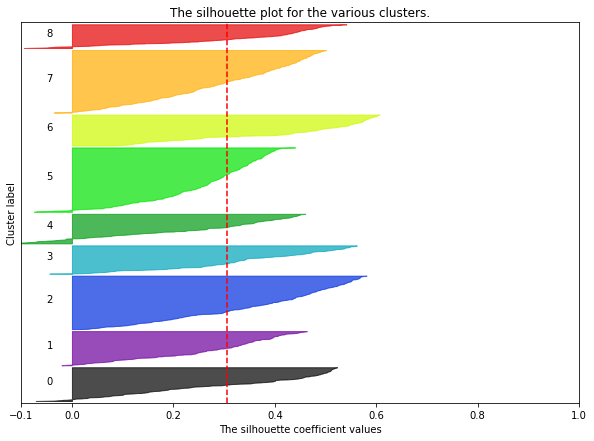

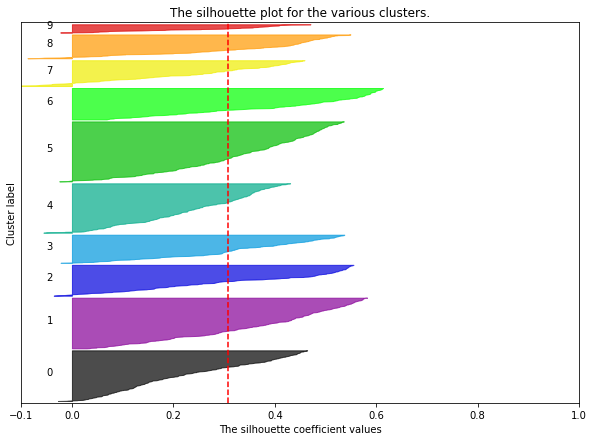

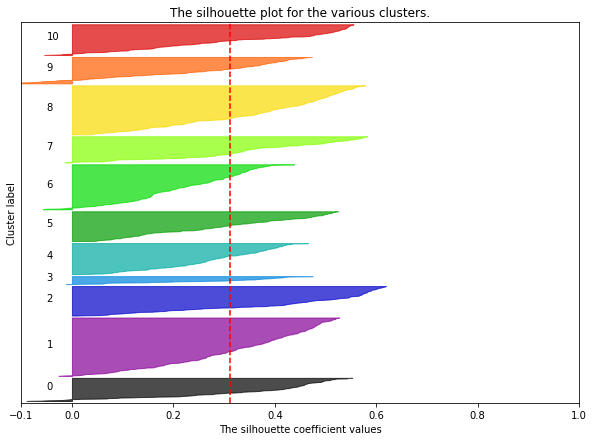

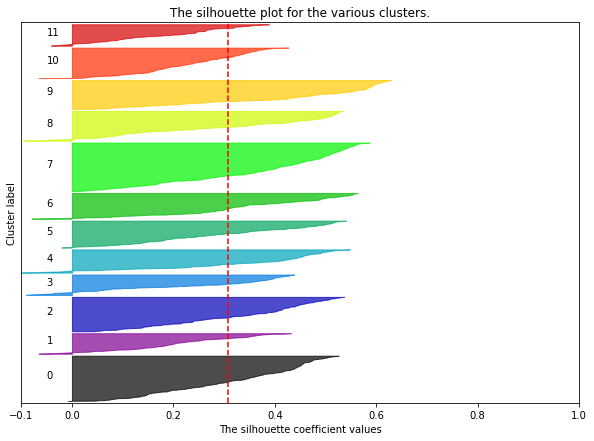

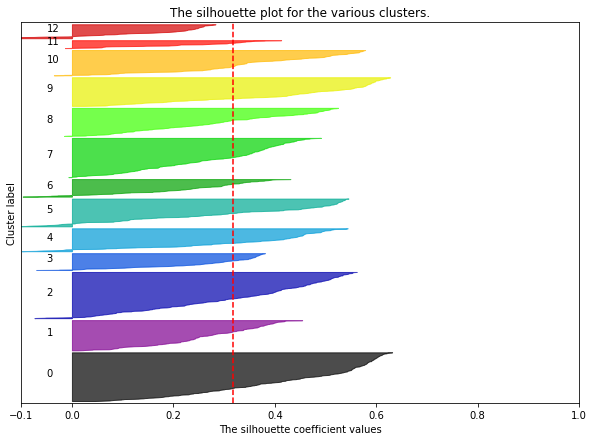

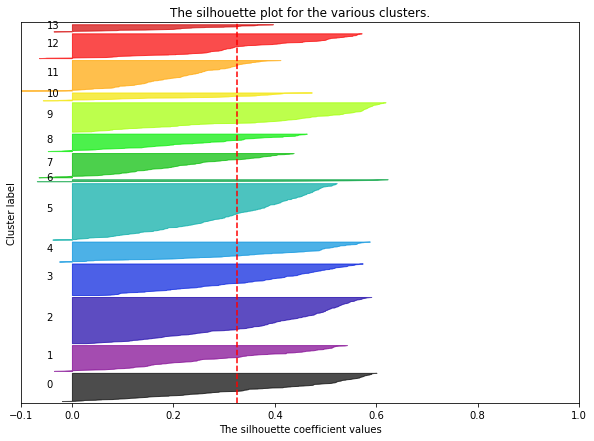

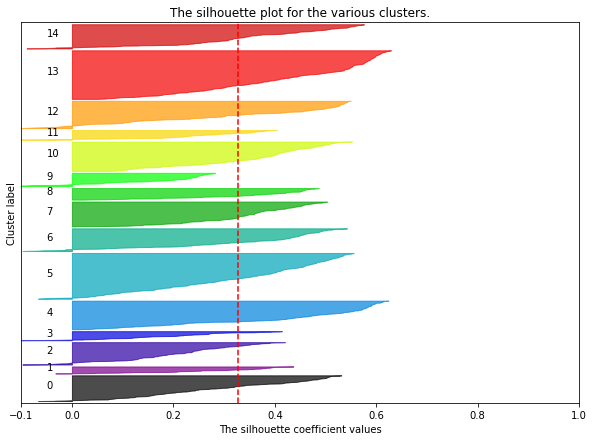

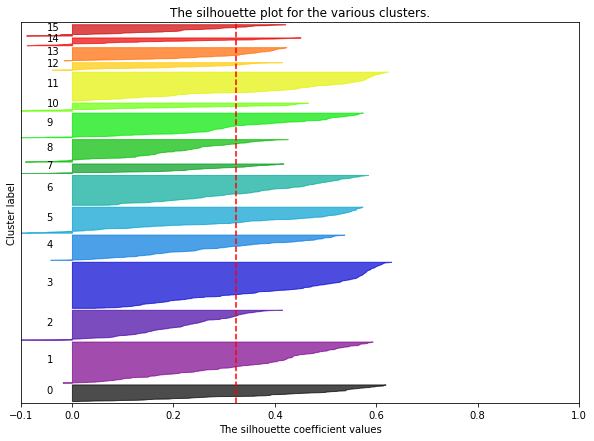

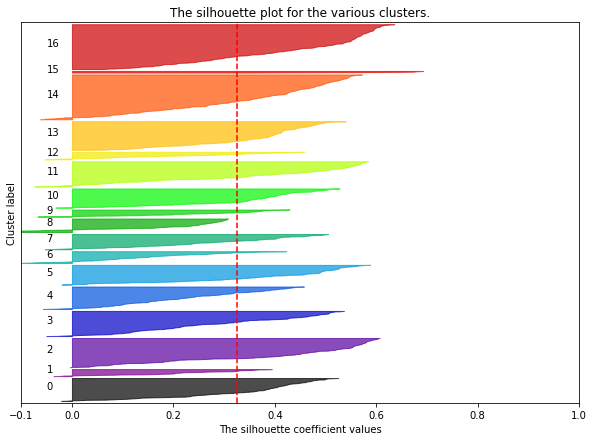

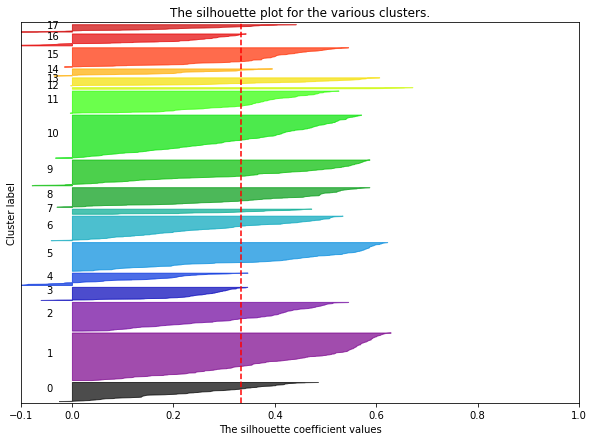

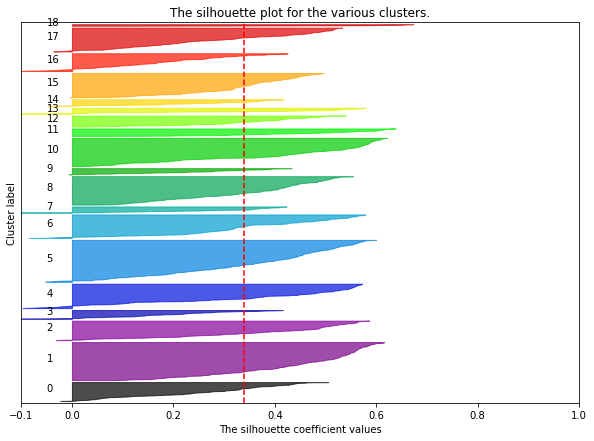

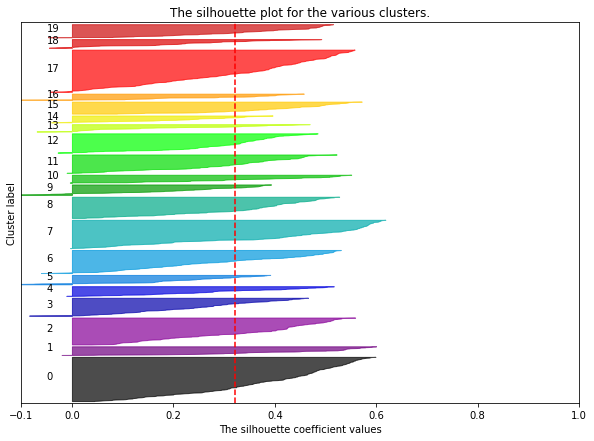

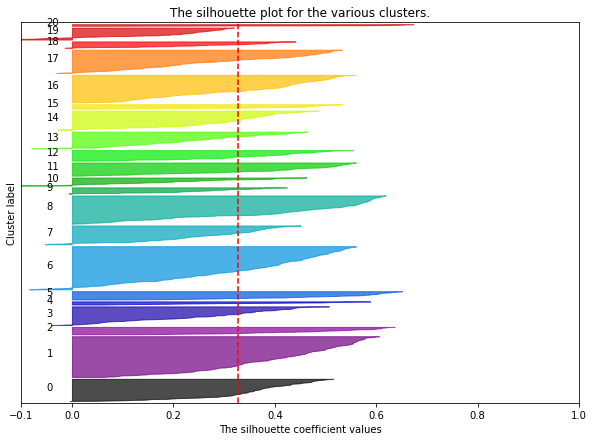

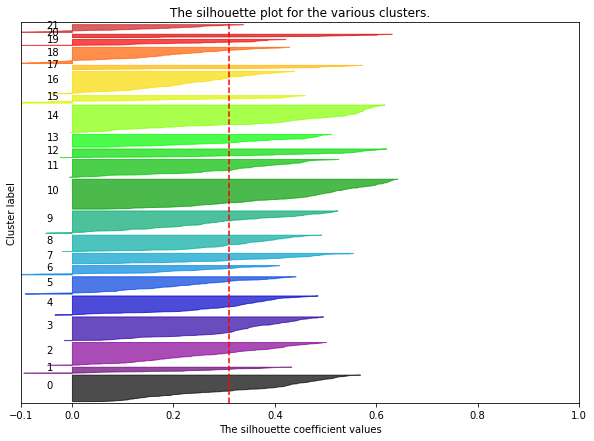

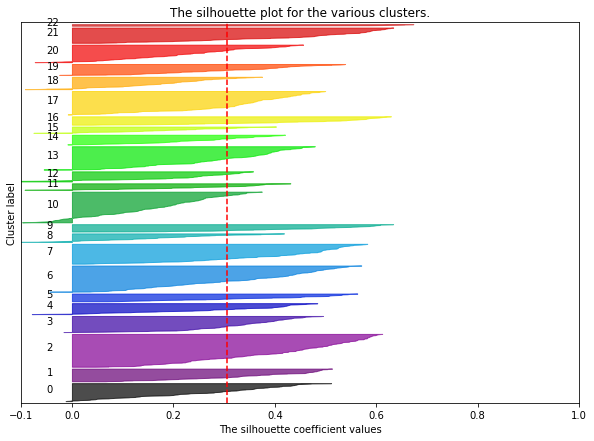

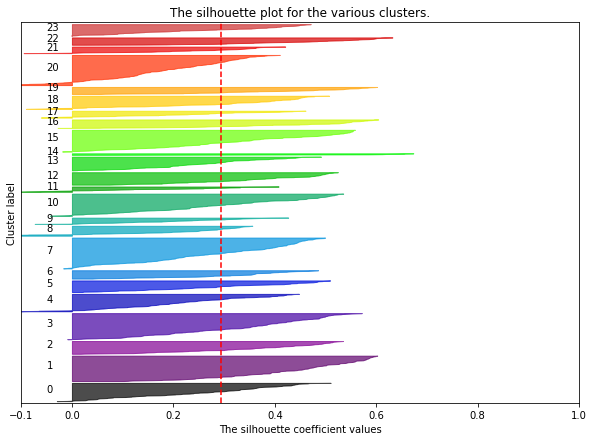

In [9]:
range_n_clusters = np.arange(2,25)
X = dengue[x_features]
score = []
for n_clusters in range_n_clusters:
    
    # Create a subplot with 1 row and 2 columns
    fig, (ax1) = plt.subplots(1, 1)
    fig.set_size_inches(10, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])
    
    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    score.append(silhouette_avg)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])


Text(0, 0.5, 'silhouette score')

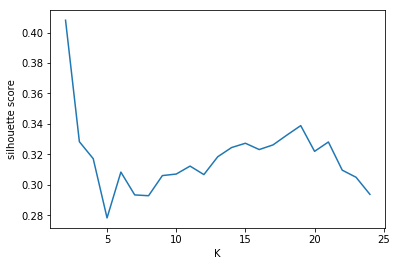

In [10]:
plt.plot(range_n_clusters,score)
plt.xlabel('K')
plt.ylabel('silhouette score')

Dada la grafica anterior se obtiene que el k mas optimo corresponde a k=19. En este caso, se ultilza el ultimo metodo para decidir, dado que se ve ma claramente el k optimo.

In [12]:
cluster19 = KMeans(n_clusters=19)
cluster_labels = cluster19.fit_predict(X)

# Parte 2 PCA y K-Means

In [34]:
from numpy import linalg as la
data = pd.read_csv('BreadBasket_DMS.csv')
data_clean = pd.DataFrame(data[:-1])

In [35]:
data.head()

,Date,Time,Transaction,Item
0,2016-10-30,09:58:11,1,Bread
1,2016-10-30,10:05:34,2,Scandinavian
2,2016-10-30,10:05:34,2,Scandinavian
3,2016-10-30,10:07:57,3,Hot chocolate
4,2016-10-30,10:07:57,3,Jam


In [36]:
#data = data.drop('Transaction',axis=1)
data.Time = pd.to_datetime(data.Time)
data.Date = pd.to_datetime(data.Date)

In [37]:
dummies = pd.get_dummies(data['Item'], prefix='Item')

In [38]:
data = pd.concat([data, dummies], axis=1)
data = data.drop('Item', axis=1)

In [39]:
x_features = data.columns[3:]

In [42]:
data = data.groupby(['Date','Time','Transaction']).sum()
data.reset_index(inplace = True)

In [44]:
data.head()

,Date,Time,Transaction,Item_Adjustment,Item_Afternoon with the baker,Item_Alfajores,Item_Argentina Night,Item_Art Tray,Item_Bacon,Item_Baguette,...,Item_The BART,Item_The Nomad,Item_Tiffin,Item_Toast,Item_Truffles,Item_Tshirt,Item_Valentine's card,Item_Vegan Feast,Item_Vegan mincepie,Item_Victorian Sponge
0,2016-10-30,2018-12-07 09:58:11,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2016-10-30,2018-12-07 10:05:34,2,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2016-10-30,2018-12-07 10:07:57,3,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2016-10-30,2018-12-07 10:08:41,4,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2016-10-30,2018-12-07 10:13:03,5,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# PCA

In [45]:
#Matriz de covarianza
cov_matrix = np.array(data[x_features].cov())
#Autovalores y autovectores
val, vec = la.eig(cov_matrix)

In [46]:
#Ordena vec y val de mayor a menor
vec = vec[:,val.argsort()[::-1]]
val = val[val.argsort()[::-1]]

In [47]:
#Vectores, nuevo sistema coordenado
vec1 = vec[:,0]
vec2 = -vec[:,1]

In [48]:
#Varianza
var = np.sum(data[x_features].var())

In [49]:
#Varianza por componente
def var_comp(vec,data,comp):
    return np.sum(data.dot(vec[:,comp])**2)/len(data)

In [50]:
var_comps = []
x_features = np.array(x_features)
for i in range(len(x_features)):
    var_comps.append(var_comp(vec,data[x_features],i)/var)

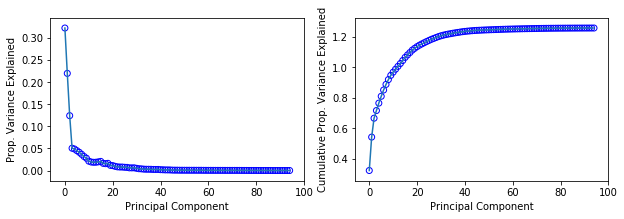

In [51]:
fig = plt.figure(figsize=(10,3))
plt.subplot(1,2,1)
x = np.arange(len(x_features))
plt.plot(x,var_comps)
plt.xlabel('Principal Component')
plt.ylabel('Prop. Variance Explained')
plt.scatter(x,var_comps,facecolors="none",edgecolors='blue')


plt.subplot(1,2,2)
cum_var = np.cumsum(np.array(var_comps))
plt.plot(x,cum_var)
plt.xlabel('Principal Component')
plt.ylabel('Cumulative Prop. Variance Explained')
plt.scatter(x,cum_var,facecolors="none",edgecolors='blue')

In [52]:
#Proyeccion de b sobre a 
def proy(a,b):
    return np.dot(a,b)/np.sqrt(np.dot(a,a))

In [53]:
#Nuevas coordenadas
new_c = []
labels = []
for index, rows in data.iterrows():
    fila = rows[x_features].values
    new_c.append([proy(vec1,fila),proy(vec2,fila)])
    #labels.append(rows['Unnamed: 0'])

Text(0, 0.5, 'Second Principal Component')

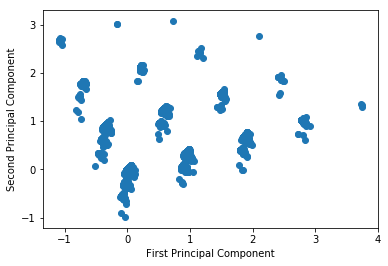

In [54]:
new_c=np.array(new_c)
plt.scatter(new_c[:,0],new_c[:,1])
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')

In [55]:
cluster16 = KMeans(n_clusters=16, random_state=10)
cluster_labels = cluster16.fit_predict(data[x_features])
data['clusters'] = cluster_labels

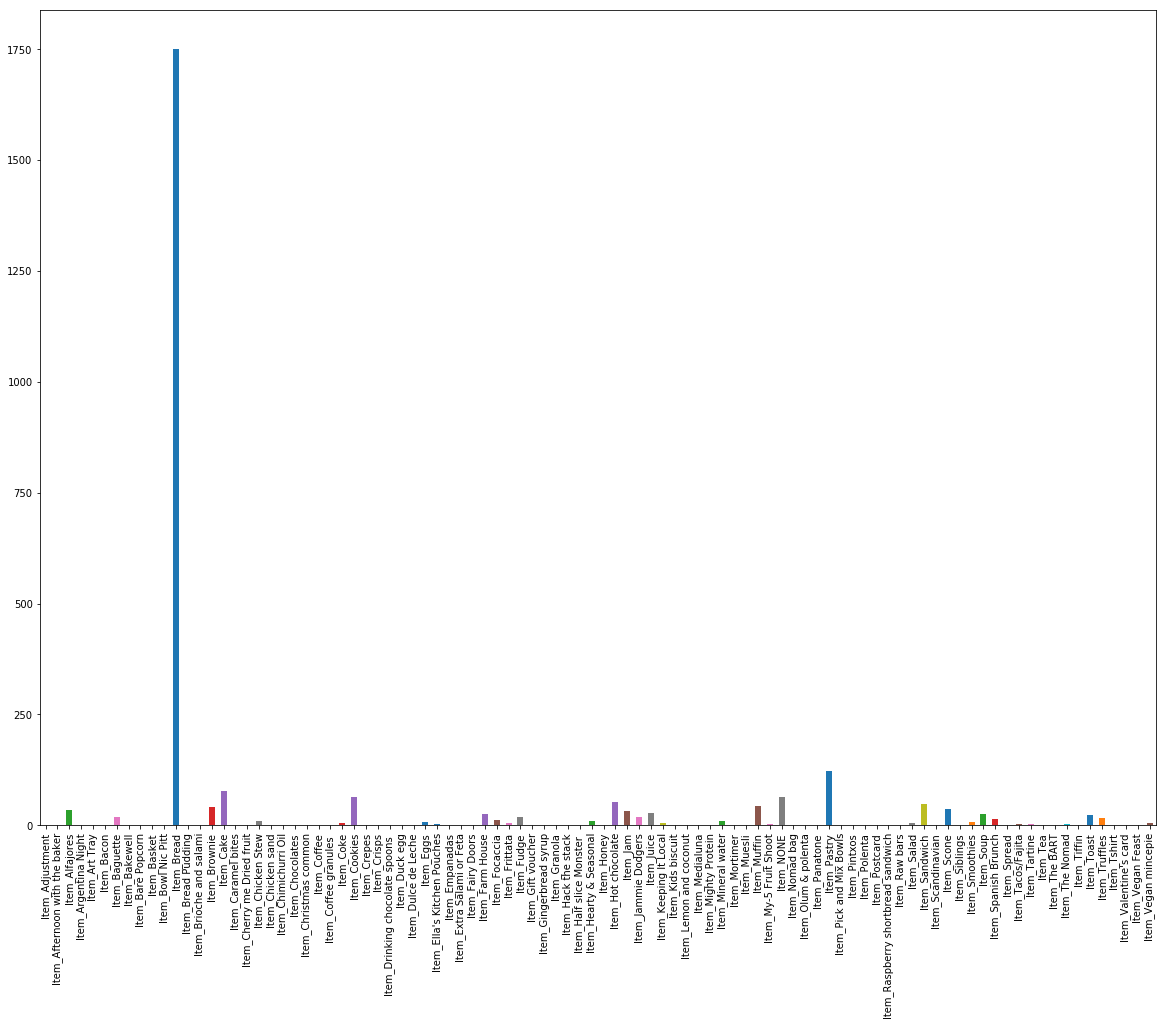

In [56]:
data[data.clusters==5].sum()[1:-2].plot.bar(fig = plt.figure(figsize = (20,15)))

Utilizando esta visualizacion, se puede ver que cada cluster representa una ocasion (dia de san valentin, fiestas, turistas de compras) y que siempre hay compras de cafe y pan.

# KMeans

In [ ]:
range_n_clusters = np.arange(80,100)
X = data[x_features]
score = []
for n_clusters in range_n_clusters:
    
    # Create a subplot with 1 row and 2 columns
    #fig, (ax1) = plt.subplots(1, 1)
    #fig.set_size_inches(10, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    #ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    #ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])
    
    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    score.append(silhouette_avg)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

For n_clusters = 80 The average silhouette_score is : 0.4001021666342405


In [ ]:
plt.plot(range_n_clusters,score)
plt.xlabel('K')
plt.ylabel('silhouette score')

En este caso, la grafica apunta a que el numero optimo de clusters es k=97, por esto se propone generar 97 clusters y a partir de la visualizacion anterior encontrar que representa cada cluster

In [ ]:
cluster97 = KMeans(n_clusters=97, random_state=10)
cluster_labels = cluster97.fit_predict(data[x_features])
data['clusters'] = cluster_labels

In [ ]:
i=0

data[data.clusters==i].sum()[1:-2].plot.bar(fig = plt.figure(figsize = (20,15)))
i+=1